In [ ]:
https://drive.google.com/file/d/16Cm2tgrpuDH8eIdxdSYyOsfDPqnJ3byd/view?usp=sharing

ФИО:

In [ ]:
Пластеева Ксения Евгеньевна

## Задание 1. HTTP-запросы, ответы и погода

Описание:

Напишите HTTP-запрос для получения информации о погоде в введенном городе из API.

Можно использовать API: https://open-meteo.com/. Используйте метод GET.


Ввод
```
56.50, 60.35
```

Вывод
```
Сегодня (1.11) погода 20 ◦С, нет осадков, туман
```





In [ ]:
pip install requests

In [ ]:
import requests
import datetime

data = input('Введите координаты города: ').split(',')
try:
    latitude = float(data[0])
    longitude = float(data[1])
    url = f'https://api.open-meteo.com/v1/forecast?latitude={latitude}&longitude={longitude}&hourly=temperature_2m,precipitation_probability,weathercode&timezone=Europe%2FMoscow'
    response = requests.get(url)
    data = response.json()
    current_hour = datetime.datetime.now().hour
    temperature = data['hourly']['temperature_2m'][current_hour]
    precipitation_probability = data['hourly']['precipitation_probability'][current_hour]
    weather_code = data['hourly']['weathercode'][current_hour]
    descriptions = {
        0:  'ясно',
        1:  'в основном ясно',
        2:  'переменная облачность',
        3:  'облачно',
        45: 'туман',
        48: 'густой туман',
        51: 'морось',
        53: 'умеренная морось',
        55: 'сильная морось',
        56: 'ледяная морось',
        57: 'сильная ледяная морось',
        61: 'небольшой дождь',
        63: 'умеренный дождь',
        65: 'сильный дождь',
        66: 'ледяной дождь',
        67: 'сильный ледяной дождь',
        71: 'небольшой снег',
        73: 'умеренный снег',
        75: 'сильный снег',
        77: 'снежные зерна',
        80: 'небольшой дождь',
        81: 'умеренный дождь',
        82: 'сильный дождь',
        85: 'небольшой снег',
        86: 'сильный снег',
        95: 'гроза',
        96: 'гроза с небольшим градом',
        99: 'гроза с сильным градом'
    }
    weather_description = descriptions.get(weather_code, 'неизвестно')
    precipitation_text = 'нет осадков' if precipitation_probability < 50 else 'осадки'
    today = datetime.date.today()
    print(f'Сегодня ({today.day}.{today.month}) погода {temperature} ◦С, {precipitation_text}, {weather_description}')
except:
    print(f'Ошибка')

Введите координаты города: 56.50, 60.35
Сегодня (19.12) погода -11.4 ◦С, нет осадков, туман


## Задание 2. HTTP-запросы, ответы и покемоны

**Описание:**


Создайте код программы, которая будет взаимодействовать с API, со следующим функионалом:

1. Используя метод GET, отправьте запрос на endpoint /pokemon, чтобы получить список первых 20 покемонов

2. Извлеките имена покемонов из ответа и выведите их списком

3. Введите с помощью input() название одного из покемонов


```
Имя покемона: clefairy
```



4. Отправьте GET-запрос, чтобы получить полную информацию о выбранном покемоне

5. Извлеките и выведите следующие данные о введенном покемоне:

     • Имя

     • Тип

     • Вес

     • Рост

     • Способности

Используйте PokéAPI (https://pokeapi.co/), который предоставляет информацию о покемонах, их характеристиках, типах и другую информацию.

In [ ]:
pip install requests

In [ ]:
import requests


def get_pokemon_list():
    url = 'https://pokeapi.co/api/v2/pokemon?limit=20'
    try:
        response = requests.get(url)
        data = response.json()
        pokemon_names = [pokemon['name'] for pokemon in data['results']]
        return pokemon_names
    except:
        print(f'Ошибка')
        return None


def get_pokemon_info(pokemon_name):
    url = f'https://pokeapi.co/api/v2/pokemon/{pokemon_name.lower()}'
    try:
        response = requests.get(url)
        response.raise_for_status()
        data = response.json()
        types = [type_data['type']['name'] for type_data in data['types']]
        abilities = [ability_data['ability']['name'] for ability_data in data['abilities']]
        pokemon_info = {
            'name': data['name'],
            'types': types,
            'weight': data['weight'],
            'height': data['height'],
            'abilities': abilities
        }
        return pokemon_info
    except:
        print(f'Ошибка')
        return None


def print_pokemon_info(pokemon_info):
    if pokemon_info:
        print(f'Имя: {pokemon_info["name"]}')
        print(f'Тип: {", ".join(pokemon_info["types"])}')
        print(f'Вес: {pokemon_info["weight"]}')
        print(f'Рост: {pokemon_info["height"]}')
        print(f'Способности: {", ".join(pokemon_info["abilities"])}')
    else:
        print('Информация о покемоне не найдена')

def main():
    pokemon_list = get_pokemon_list()
    if not pokemon_list:
        return
    print('Список первых 20 покемонов:')
    for name in pokemon_list:
        print(f'{name}')
    pokemon_name = input('Введите название покемона: ')
    pokemon_info = get_pokemon_info(pokemon_name)
    print_pokemon_info(pokemon_info)

main()

Список первых 20 покемонов:
bulbasaur
ivysaur
venusaur
charmander
charmeleon
charizard
squirtle
wartortle
blastoise
caterpie
metapod
butterfree
weedle
kakuna
beedrill
pidgey
pidgeotto
pidgeot
rattata
raticate
Введите название покемона: pidgey
Имя: pidgey
Тип: normal, flying
Вес: 18
Рост: 3
Способности: keen-eye, tangled-feet, big-pecks


## Задание 3. HTTP-запросы, ответы и посты

**Описание:**

Создайте программу, которая будет взаимодействовать с JSONPlaceholder API, реализуя следующие функции:

1. Реализуйте функцию, которая выполняет GET-запрос к https://jsonplaceholder.typicode.com/posts и возвращает список постов в формате JSON

2. Реализуйте функцию, котороая получает вводимое ID поста, выполняет GET-запрос по ID и возвращает данные поста в формате JSON

3. Реализуйте функцию, которая выполняет обработку JSON из пункта 2 и выводит всю важную информацию в консоль

In [ ]:
import requests


def get_all_posts():
    url = 'https://jsonplaceholder.typicode.com/posts'
    try:
        response = requests.get(url)
        response.raise_for_status()
        return response.json()
    except :
        print(f'Ошибка')


def get_post_by_id(post_id):
    url = f'https://jsonplaceholder.typicode.com/posts/{post_id}'
    try:
        response = requests.get(url)
        response.raise_for_status()
        return response.json()
    except:
        print(f'Ошибка')
        return None


def print_post_info(post_data):
    if post_data:
        print(f'ID поста: {post_data["id"]}')
        print(f'ID пользователя: {post_data["userId"]}')
        print(f'Заголовок: {post_data["title"]}')
        print(f'Содержание: {post_data["body"]}')
    else:
        print('Данные поста недоступны')

def main():
    posts = get_all_posts()
    if not posts:
        return
    print('Список всех постов:')
    for post in posts:
        print(f'- ID: {post["id"]}, Заголовок: {post["title"]}')
    post_id = input('Введите ID поста для получения информации: ')
    try:
        post_id = int(post_id)
    except ValueError:
        print('ID поста должен быть числом')
        return
    post = get_post_by_id(post_id)
    print_post_info(post)


main()

Список всех постов:
- ID: 1, Заголовок: sunt aut facere repellat provident occaecati excepturi optio reprehenderit
- ID: 2, Заголовок: qui est esse
- ID: 3, Заголовок: ea molestias quasi exercitationem repellat qui ipsa sit aut
- ID: 4, Заголовок: eum et est occaecati
- ID: 5, Заголовок: nesciunt quas odio
- ID: 6, Заголовок: dolorem eum magni eos aperiam quia
- ID: 7, Заголовок: magnam facilis autem
- ID: 8, Заголовок: dolorem dolore est ipsam
- ID: 9, Заголовок: nesciunt iure omnis dolorem tempora et accusantium
- ID: 10, Заголовок: optio molestias id quia eum
- ID: 11, Заголовок: et ea vero quia laudantium autem
- ID: 12, Заголовок: in quibusdam tempore odit est dolorem
- ID: 13, Заголовок: dolorum ut in voluptas mollitia et saepe quo animi
- ID: 14, Заголовок: voluptatem eligendi optio
- ID: 15, Заголовок: eveniet quod temporibus
- ID: 16, Заголовок: sint suscipit perspiciatis velit dolorum rerum ipsa laboriosam odio
- ID: 17, Заголовок: fugit voluptas sed molestias voluptatem prov

## Задание 4. HTTP-запросы, ответы и работа с постами

**Описание**

Создайте программу, которая будет взаимодействовать с JSONPlaceholder API (из предыдущего задания), реализуя новые функции:

1. Реализуйте функцию, которая принимает заголовок, содержимое и ID пользователя (информация вводится с помощью input()), выполняет POST-запрос для создания нового поста и возвращает информацию о созданном посте в формате JSON


```
Заголовок: Новый пост
Содержимое поста: Тут должно находиться содержимое нового поста...
ID пользователя: 10
```



2. Реализуйте функцию, которая принимает ID поста, новый заголовок и новое содержимое, выполняет PUT-запрос и возвращает обновлённый пост в формате JSON

3. Реализуйте функцию, которая принимает ID поста, выполняет DELETE-запрос и возвращает статус-код ответа

In [ ]:
import requests

def create_post(title, body, user_id):
    url = 'https://jsonplaceholder.typicode.com/posts'
    headers = {'Content-type': 'application/json'}
    data = {
        'title': title,
        'body': body,
        'userId': user_id
    }
    try:
        response = requests.post(url, headers=headers, json=data)
        response.raise_for_status()
        return response.json()
    except:
        print(f'{Ошибка}')
        return None


def update_post(post_id, title, body):
    url = f'https://jsonplaceholder.typicode.com/posts/{post_id}'
    headers = {'Content-type': 'application/json'}
    data = {
        'id': post_id,
        'title': title,
        'body': body
    }
    try:
        response = requests.put(url, headers=headers, json=data)
        response.raise_for_status()
        return response.json()
    except :
        print(f'Ошибка')
        return None


def delete_post(post_id):
    url = f'https://jsonplaceholder.typicode.com/posts/{post_id}'
    try:
        response = requests.delete(url)
        response.raise_for_status()
        return response.status_code
    except:
        print(f'Ошибка')
        return None


def main():
    title = input('Введите заголовок нового поста: ')
    body = input('Введите содержимое нового поста: ')
    user_id = input('Введите ID пользователя: ')
    user_id = int(user_id)
    new_post = create_post(title, body, user_id)
    if new_post:
        print('Созданный пост:')
        print(new_post)
    else:
        return
    post_id = input('Введите ID поста для обновления: ')
    title = input('Введите новый заголовок: ')
    body = input('Введите новое содержимое: ')
    post_id = int(post_id)
    updated_post = update_post(post_id, title, body)
    if updated_post:
        print('Обновленный пост:')
        print(updated_post)
    else:
        return
    post_id_delete = input('Введите ID поста для удаления: ')
    post_id_delete = int(post_id_delete)
    delete_status = delete_post(post_id_delete)
    if delete_status:
        print(f'Статус код при удалении: {delete_status}')
    else:
       return


main()

Введите заголовок нового поста: пост
Введите содержимое нового поста: содержимое
Введите ID пользователя: 10
Созданный пост:
{'title': 'пост', 'body': 'содержимое', 'userId': 10, 'id': 101}
Введите ID поста для обновления: 101
Введите новый заголовок: новый заголовок
Введите новое содержимое: содержимое
Ошибка


## Задание 5. HTTP-запросы, ответы и пёсики

**Описание**

Создайте программу, которая будет взаимодействовать с Dog API, которая позволит получать список пород собак, вводить несколько пород и получать их фотогрфии.

Этапы:

1. Создайте функцию, которая использует метод GET и возвращает список всех пород собак в формате нумерованного списка

2. Реализуйте возможность ввода нескольких пород собак через запятую


```
african, chow, dingo
```



3. Создание функции, которая реализует запрос, возвращает и выводит изображениия собак, породы которых были введены до этого


Используйте Dog API (https://dog.ceo/dog-api/), который предоставляет информацию о породах собак и их изображения.


*Подсказка*



```
import requests
from PIL import Image
from IPython.display import display
import io

url = ____
response = ____
        
if response.________ == ___:
      image_url = response.json()['message']

res = requests.get(image_url)
img = Image.open(io.BytesIO(res.content))
display(img)
```



Список пород собак:
1. affenpinscher
2. african
3. airedale
4. akita
5. appenzeller
6. kelpie australian
7. shepherd australian
8. indian bakharwal
9. basenji
10. beagle
11. bluetick
12. borzoi
13. bouvier
14. boxer
15. brabancon
16. briard
17. norwegian buhund
18. boston bulldog
19. english bulldog
20. french bulldog
21. staffordshire bullterrier
22. australian cattledog
23. cavapoo
24. chihuahua
25. indian chippiparai
26. chow
27. clumber
28. cockapoo
29. border collie
30. coonhound
31. cardigan corgi
32. cotondetulear
33. dachshund
34. dalmatian
35. great dane
36. swedish danish
37. scottish deerhound
38. dhole
39. dingo
40. doberman
41. norwegian elkhound
42. entlebucher
43. eskimo
44. lapphund finnish
45. bichon frise
46. indian gaddi
47. germanshepherd
48. indian greyhound
49. italian greyhound
50. groenendael
51. havanese
52. afghan hound
53. basset hound
54. blood hound
55. english hound
56. ibizan hound
57. plott hound
58. walker hound
59. husky
60. keeshond
61. kelpie
62. kom

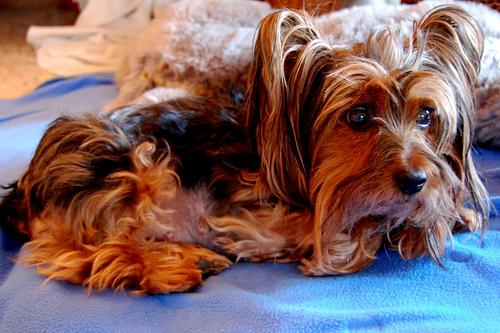

Изображение породы: vizsla


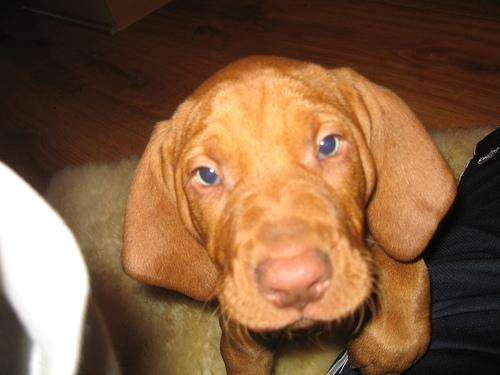

In [ ]:
import requests
from PIL import Image
from IPython.display import display
import io

def get_all_breeds():
    url = 'https://dog.ceo/api/breeds/list/all'
    try:
        response = requests.get(url)
        response.raise_for_status()
        breeds = response.json()['message']
        breed_list = []
        i = 1
        for breed, sub_breeds in breeds.items():
             if sub_breeds:
                 for sub_breed in sub_breeds:
                     breed_list.append(f'{i}. {sub_breed} {breed}')
                     i+=1
             else:
                 breed_list.append(f'{i}. {breed}')
                 i+=1
        return breed_list
    except requests.exceptions.RequestException as e:
        print(f'Ошибка при запросе к API: {e}')
        return None
    except KeyError as e:
        print(f'Ошибка при разборе JSON: {e}')
        return None


def get_dog_images(breeds):
    for breed in breeds:
        breed_parts = breed.split()
        if len(breed_parts) == 2:
           sub_breed = breed_parts[0]
           main_breed = breed_parts[1]
           url = f'https://dog.ceo/api/breed/{main_breed}/{sub_breed}/images/random'
        else:
            url = f'https://dog.ceo/api/breed/{breed}/images/random'
        try:
            response = requests.get(url)
            response.raise_for_status()
            image_url = response.json()['message']
            res = requests.get(image_url)
            img = Image.open(io.BytesIO(res.content))
            print(f'Изображение породы: {breed}')
            display(img)
        except requests.exceptions.RequestException as e:
              print(f'Ошибка при запросе изображения породы {breed}: {e}')
        except KeyError as e:
             print(f'Ошибка при разборе JSON для породы {breed}: {e}')



breeds = get_all_breeds()
if breeds:
  print('Список пород собак:')
  for breed in breeds:
    print(breed)
  breeds_input = input('Введите породы собак через запятую: ').split(',')
  formatted_breeds = [breed.strip() for breed in breeds_input]
  get_dog_images(formatted_breeds)